In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

plt.style.use('ggplot')

### Load data

In [ ]:
# Load original test set for model inference
path_to_orig_test_data = "../data/interim/test/interim_data_v0.1.csv"
orig_test_data = pd.read_csv(path_to_orig_test_data, encoding="utf-8")

# Load processed test set for model inference
path_to_proc_test_data = "../data/processed/test/processed_data_v0.1.csv"
test_df = pd.read_csv(path_to_proc_test_data, encoding="utf-8")

# Load processed train set for model training and validation
path_to_proc_train_data = "../data/processed/train/processed_data_v0.1.csv"
train_df = pd.read_csv(path_to_proc_train_data, encoding="utf-8")

In [3]:
train_df.head()

,review,rating,sentiment,review_stemmed,review_lemma
0,"['long', 'queuefood', 'excellentplace', 'clean...",4,1,"['long', 'queuefood', 'excellentplac', 'cleanf...","['long', 'queuefood', 'excellentplace', 'clean..."
1,"['fast', 'clean', 'bit', 'priced', 'guess', 'l...",4,1,"['fast', 'clean', 'bit', 'price', 'guess', 'lo...","['fast', 'clean', 'bit', 'price', 'guess', 'lo..."
2,"['order', 'wrong', 'nothing', 'right', 'ill', ...",1,-1,"['order', 'wrong', 'noth', 'right', 'ill', 'ne...","['order', 'wrong', 'nothing', 'right', 'ill', ..."
3,"['strange', 'people', 'sometimes', 'gets', 'jo...",4,1,"['strang', 'peopl', 'sometim', 'get', 'job', '...","['strange', 'people', 'sometimes', 'get', 'job..."
4,['good'],4,1,['good'],['good']


In [4]:
X = train_df['review_lemma']
y = train_df['sentiment']

X_inf = test_df['review_lemma']
y_inf = test_df['sentiment']

### Feature extraction

In [ ]:
# # Convert the text into a bag-of-words model
# vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# X_vec = vectorizer.fit_transform(X)
# X_inf_vec = vectorizer.transform(X_inf)

In [ ]:
# Convert the text into a tf-idf model
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
X_inf_vec = vectorizer.transform(X_inf)

## Logistic Regression

### Model training

In [9]:
# Prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Create model
lr = LogisticRegression()

# evaluate model
scores = cross_val_score(lr, X_vec, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report perfomance
print(f"Accuracy: {np.mean(scores)}")

Accuracy: 0.9088785481027208


### Model inference

In [150]:

lr.fit(X_vec, y)

LogisticRegression()

In [151]:
y_pred = lr.predict(X_inf_vec)

In [152]:
print("Confusion matrix:")
print(confusion_matrix(y_pred,y_inf))

Confusion matrix:
[[1166  138]
 [ 110 1466]]


In [153]:
print("Classification Report:")
print(classification_report(y_pred,y_inf))

Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.89      0.90      1304
           1       0.91      0.93      0.92      1576

    accuracy                           0.91      2880
   macro avg       0.91      0.91      0.91      2880
weighted avg       0.91      0.91      0.91      2880



In [154]:
X_inf_orig = orig_test_data[:5]['review']
X_inf_proc = X_inf_vec[:5]

In [155]:
for i in range(X_inf_orig.shape[0]):
    print(f"Review: {X_inf_orig.iloc[i]}")
    print(f"Sentiment: [{'positive' if lr.predict(X_inf_proc[i]) > 0 else 'negative'}]\n")

Review: Its ice cream cone is the best part of this branch
Sentiment: [positive]

Review: The drivethru line at this location is, had been, and will always be broken. Dont ask me why, because i do not know. Maybe it is because the 3rd window is rarely used. Idk, but go inside if you have a small order as its faster to go to a register. Check your order when they are super busy as they give you a diet, or another order on occasion. Otherwise my favorite place to get a large coke, for $1$.
Sentiment: [negative]

Review: Stopped here after picking up my brother from school, there was a bit of a line but it moved pretty fast and the food was absolutely fantastic usually mcdonalds is hit or miss in multiple areas this location was fast service and really fresh food!!!!!
Sentiment: [positive]

Review: Service was quick despite longer line. Order has always been correct. Staff is friendly.
Sentiment: [positive]

Review: Fries are always good. Ice cream is ALWAYS not working
Sentiment: [positi

## Random Forest

### Model training

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import numpy as np

In [14]:
forest = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

print(f"CV accuracy score: {np.mean(cross_val_score(forest, X_vec, y, cv=5)): .3f}")

CV accuracy score:  0.912


### Model inference

In [158]:
forest.fit(X_vec, y)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [159]:
y_pred = forest.predict(X_inf_vec)

In [160]:
print("Confusion matrix:")
print(confusion_matrix(y_pred,y_inf))

Confusion matrix:
[[1181  144]
 [  95 1460]]


In [161]:
print("Classification Report:")
print(classification_report(y_pred,y_inf))

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1325
           1       0.91      0.94      0.92      1555

    accuracy                           0.92      2880
   macro avg       0.92      0.92      0.92      2880
weighted avg       0.92      0.92      0.92      2880



In [162]:
X_inf_orig = orig_test_data[5:10]['review']
X_inf_proc = X_inf_vec[5:10]

In [163]:
for i in range(X_inf_orig.shape[0]):
    print(f"Review: {X_inf_orig.iloc[i]}")
    print(f"Sentiment: [{'positive' if forest.predict(X_inf_proc[i]) > 0 else 'negative'}]\n")

Review: Same as any other McDonald's.
Sentiment: [negative]

Review: Homeless hang out ! Every day customers are being attacked in the store why security guards stand around and watch !
Sentiment: [positive]

Review: Just had a quick coffee and pastry. Hit the spot when in a rush.
Sentiment: [negative]

Review: Pure attitude from young lady at window.  Not a place I will go to ever again.
Sentiment: [negative]

Review: Terrible
Sentiment: [negative]



### Model fine-tuning

In [164]:
def evaluate_random_forest_with_grid(X, y, param_name, param_values, fixed_params=None, n_splits=5, random_state=42):
    # Initialize fixed_params if None
    if fixed_params is None:
        fixed_params = {}
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Create lists to maintain accuracy for training and test datasets
    train_acc = []
    test_acc = []

    # Iterate over the list of parameter values for the given parameter
    for param_value in param_values:
        # Combine the fixed parameters with the current parameter value
        params = {param_name: param_value, **fixed_params}
        
        # Initialize the RandomForestClassifier with the current parameters
        rfc = RandomForestClassifier(random_state=random_state, n_jobs=-1, oob_score=True, **params)
        
        temp_train_acc = []
        temp_test_acc = []
        
        # Cross-validation loop
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Vectorize the text data
            vectorizer = TfidfVectorizer()
            X_train_vec = vectorizer.fit_transform(X_train)
            X_test_vec = vectorizer.transform(X_test)

            # Train and evaluate the model
            rfc.fit(X_train_vec, y_train)
            temp_train_acc.append(rfc.score(X_train_vec, y_train))
            temp_test_acc.append(rfc.score(X_test_vec, y_test))
        
        # Store results for current parameter value
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
    
    # Convert lists to NumPy arrays for easier manipulation
    train_acc = np.asarray(train_acc)
    test_acc = np.asarray(test_acc)

    print(f"Best accuracy on CV is {max(test_acc.mean(axis=1))*100:.2f}% with {param_name}: {param_values[np.argmax(test_acc.mean(axis=1))]}")

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(param_values, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax.plot(param_values, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax.fill_between(param_values, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(param_values, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
    ax.legend(loc='best')
    ax.set_ylim([0.88,1.02])
    ax.set_ylabel("Accuracy")
    ax.set_xlabel(param_name)
    plt.show()

In [20]:
import warnings 
warnings.filterwarnings("ignore")

Best accuracy on CV is 91.28% with n_estimators: 210


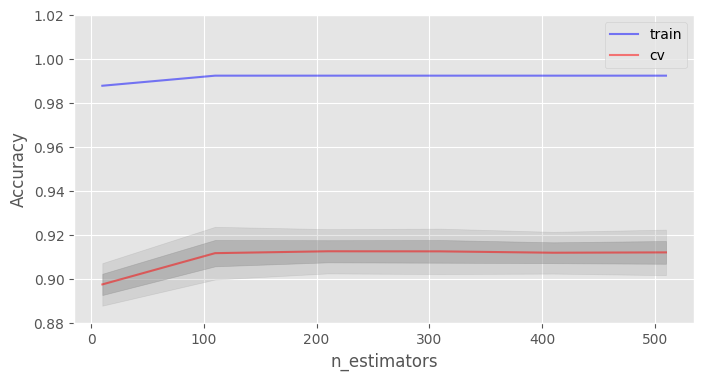

In [170]:
param_name = 'n_estimators'
# param_values = [x for x in range(10, 500, 50)]
param_values = [x for x in range(10, 601, 100)]
# fixed_params = {'max_depth': 10, 'min_samples_leaf': 2}  # Keeping other parameters fixed

evaluate_random_forest_with_grid(X, y, param_name, param_values)

Best accuracy on CV is 91.16% with max_depth: 550


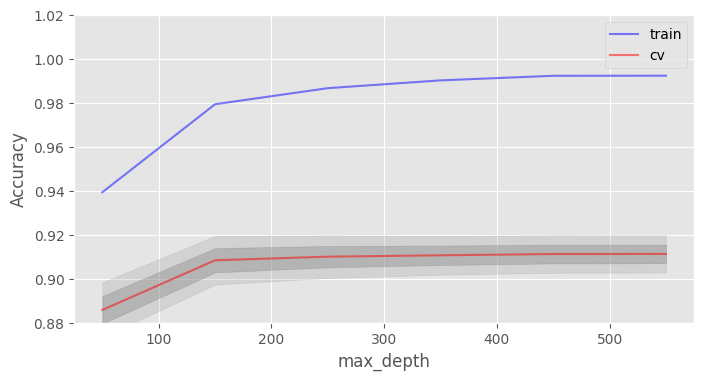

In [171]:
param_name = 'max_depth'
param_values = [x for x in range(50, 551, 100)]
evaluate_random_forest_with_grid(X, y, param_name, param_values)

Best accuracy on CV is 91.18% with min_samples_leaf: 1


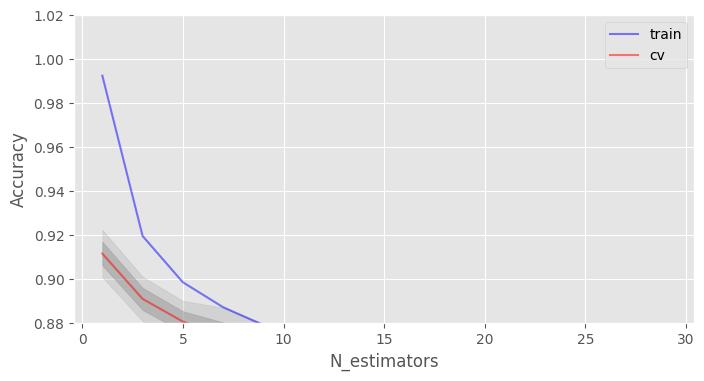

In [123]:
param_name = 'min_samples_leaf'
param_values = [x for x in range(1, 30, 2)]
evaluate_random_forest_with_grid(X, y, param_name, param_values)

Best accuracy on CV is 91.42% with max_features: 11


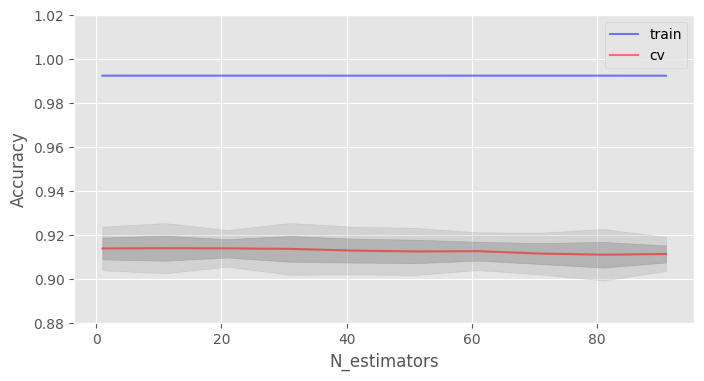

In [136]:
param_name = 'max_features'
param_values = [x for x in range(1, 100, 10)]
evaluate_random_forest_with_grid(X, y, param_name, param_values)

### Tune models' parameters with cross-validation (Grid Search)

In [173]:
forest = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, n_estimators=300, min_samples_leaf=1, max_depth=550, max_features=20)
print(f"CV accuracy score: {np.mean(cross_val_score(forest, X_vec, y, cv=5)): .3f}")

CV accuracy score:  0.915


In [168]:
# Tune Random Forest parameters
forest_params = {
    'n_estimators': range(100, 401, 2*100),
    'max_depth': range(300, 501, 2*100),
    'max_features': range(10, 71, 2*20)
}

forest_grid = GridSearchCV(forest, forest_params, 
                         cv=5, n_jobs=-1,   # 5-fold cross-validation
                         verbose=True)

forest_grid.fit(X_vec, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=400, max_features=20,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(300, 501, 200),
                         'max_features': range(10, 71, 40),
                         'n_estimators': range(100, 401, 200)},
             verbose=True)

In [169]:
print(f"Best params: {forest_grid.best_params_}")
print(f"Best score: {forest_grid.best_score_}")

Best params: {'max_depth': 500, 'max_features': 50, 'n_estimators': 300}
Best score: 0.9153008716573762


## BERT

In [3]:
from transformers import BertTokenizer
from datasets import Dataset, DatasetDict

c:\Users\Zhenia\Desktop\Education\Master\Семестр 1\Штучний інтелект (Марченко Олександр Олександрович)\lab1\lab\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [4]:
path_to_orig_train_data = "../data/interim/train/interim_data_v0.1.csv"
path_to_orig_test_data = "../data/interim/test/interim_data_v0.1.csv"
orig_train_data = pd.read_csv(path_to_orig_train_data, encoding="utf-8")
orig_test_data = pd.read_csv(path_to_orig_test_data, encoding="utf-8")

### Preprocess data

BERT requires input in a specific format:
* Input text needs to be tokenized into subwords using the BERT tokenizer.
* Input must have attention masks to differentiate padding tokens from actual data.

In [5]:
# Remove reviews with rating '3' as neutrals, because we classify only positive/negative
train_data = orig_train_data[orig_train_data['rating'] != 3]
test_data = orig_test_data[orig_test_data['rating'] != 3]

# Classify scores as positive (1) and negative (-1)
train_data['label'] = train_data['rating'].apply(lambda rating : 1 if rating > 3 else 0 if rating < 3 else np.nan)
test_data['label'] = test_data['rating'].apply(lambda rating : 1 if rating > 3 else 0 if rating < 3 else np.nan)

train_data.drop(columns=['rating'], inplace=True)
test_data.drop(columns=['rating'], inplace=True)

train_data

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_18364\1775835801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'] = train_data['rating'].apply(lambda rating : 1 if rating > 3 else 0 if rating < 3 else np.nan)
C:\Users\Zhenia\AppData\Local\Temp\ipykernel_18364\1775835801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['label'] = test_data['rating'].apply(lambda rating : 1 if rating > 3 else 0 if rating < 3 else np.nan)
C:\Users\Zhenia\AppData\Local\Temp\ipykernel_18364\17758

,review,label
0,Not a long queue..Food was excellent..place wa...,1
2,Fast and clean. A bit over priced but I guess ...,1
4,"My order was wrong, nothing was right about it...",0
5,"Strange people here sometimes, but it gets the...",1
6,Good,1
...,...,...
30040,Good burgers,1
30041,Fast drive thru,1
30042,Bum central avoid this one at all costs,0
30044,Was able to get dinner in just under 9 minutes...,1


In [44]:
test_data

,review,label
0,Its ice cream cone is the best part of this br...,1
1,"The drivethru line at this location is, had be...",1
2,Stopped here after picking up my brother from ...,1
3,Service was quick despite longer line. Order h...,1
5,Same as any other McDonald's.,1
...,...,...
3332,It was great other than the soda options weren...,1
3333,Garbage,0
3336,Fries are a hit and miss at this place,0
3337,The store was filthy. Employees were using pro...,0


In [6]:
dataset = Dataset.from_pandas(train_data)

dataset_dict = DatasetDict({"train": dataset})

print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['review', 'label', '__index_level_0__'],
        num_rows: 25691
    })
})


In [42]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    # return tokenizer(examples['review'], padding="max_length", truncation=True)
    return tokenizer(examples['review'], padding=True, truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 25691/25691 [00:16<00:00, 1594.34 examples/s]


In [43]:
tokenized_dataset

Dataset({
    features: ['review', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 25691
})

In [9]:
pd.DataFrame({
    'text':tokenized_dataset[:5]['review'],
    'label':tokenized_dataset[:5]['label'],
    'input_ids':tokenized_dataset[:5]['input_ids'],
    'token_type_ids':tokenized_dataset[:5]['token_type_ids'],
    'attention_mask':tokenized_dataset[:5]['attention_mask']
})

,text,label,input_ids,token_type_ids,attention_mask
0,Not a long queue..Food was excellent..place wa...,1,"[101, 2025, 1037, 2146, 24240, 1012, 1012, 283...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Fast and clean. A bit over priced but I guess ...,1,"[101, 3435, 1998, 4550, 1012, 1037, 2978, 2058...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"My order was wrong, nothing was right about it...",0,"[101, 2026, 2344, 2001, 3308, 1010, 2498, 2001...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"Strange people here sometimes, but it gets the...",1,"[101, 4326, 2111, 2182, 2823, 1010, 2021, 2009...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Good,1,"[101, 2204, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Preparing the Dataset

In [12]:
train_testvalid = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_testvalid['train']
valid_dataset = train_testvalid['test']

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
valid_dataloader = DataLoader(valid_dataset, batch_size=8)

### Setting Up the BERT Model for Fine-Tuning

In [14]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Training the Model

In [15]:
import accelerate
import transformers
transformers.__version__, accelerate.__version__

('4.46.0', '1.0.1')

In [16]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='../bert_results',
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

trainer.train()

c:\Users\Zhenia\Desktop\Education\Master\Семестр 1\Штучний інтелект (Марченко Олександр Олександрович)\lab1\lab\.venv\lib\site-packages\transformers\training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 33%|███▎      | 1285/3855 [1:52:40<3:13:35,  4.52s/it]

{'loss': 0.2047, 'grad_norm': 0.3422187268733978, 'learning_rate': 1.3333333333333333e-05, 'epoch': 1.0}



 33%|███▎      | 1285/3855 [2:00:26<3:13:35,  4.52s/it]

{'eval_loss': 0.16958028078079224, 'eval_runtime': 466.1813, 'eval_samples_per_second': 11.024, 'eval_steps_per_second': 0.174, 'epoch': 1.0}


 67%|██████▋   | 2570/3855 [3:52:55<1:46:52,  4.99s/it]   

{'loss': 0.1154, 'grad_norm': 0.17623589932918549, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}



 67%|██████▋   | 2570/3855 [4:00:59<1:46:52,  4.99s/it]

{'eval_loss': 0.1951487809419632, 'eval_runtime': 483.8662, 'eval_samples_per_second': 10.621, 'eval_steps_per_second': 0.167, 'epoch': 2.0}


100%|██████████| 3855/3855 [5:53:29<00:00,  4.57s/it]    

{'loss': 0.07, 'grad_norm': 8.597256660461426, 'learning_rate': 0.0, 'epoch': 3.0}



100%|██████████| 3855/3855 [6:01:15<00:00,  4.57s/it]

{'eval_loss': 0.2246093451976776, 'eval_runtime': 466.0064, 'eval_samples_per_second': 11.028, 'eval_steps_per_second': 0.174, 'epoch': 3.0}


100%|██████████| 3855/3855 [6:01:16<00:00,  5.62s/it]

{'train_runtime': 21676.3662, 'train_samples_per_second': 2.844, 'train_steps_per_second': 0.178, 'train_loss': 0.13001106944993313, 'epoch': 3.0}


TrainOutput(global_step=3855, training_loss=0.13001106944993313, metrics={'train_runtime': 21676.3662, 'train_samples_per_second': 2.844, 'train_steps_per_second': 0.178, 'total_flos': 4055593807319040.0, 'train_loss': 0.13001106944993313, 'epoch': 3.0})

### Evaluating the Model

In [17]:
metrics = trainer.evaluate()
print(metrics)

100%|██████████| 81/81 [07:27<00:00,  5.52s/it]

{'eval_loss': 0.2246093451976776, 'eval_runtime': 453.2138, 'eval_samples_per_second': 11.339, 'eval_steps_per_second': 0.179, 'epoch': 3.0}


In [18]:
predictions = trainer.predict(valid_dataset)
print(predictions)

100%|██████████| 81/81 [09:19<00:00,  6.91s/it]

PredictionOutput(predictions=array([[-4.0999203,  3.9662025],
       [ 3.2060432, -3.0695806],
       [-4.0999203,  3.9662025],
       ...,
       [-1.6521827,  1.7814839],
       [-3.3458366,  3.4879804],
       [ 2.9925022, -2.9107823]], dtype=float32), label_ids=array([1, 0, 1, ..., 1, 1, 0]), metrics={'test_loss': 0.2246093451976776, 'test_runtime': 566.2929, 'test_samples_per_second': 9.075, 'test_steps_per_second': 0.143})


In [32]:
predictions[1]

array([1, 0, 1, ..., 1, 1, 0])

In [27]:
valid_dataset

Dataset({
    features: ['review', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5139
})

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_dataset['label'], predictions[1])

1.0

In [40]:
valid_dataset['label'] == predictions[1].tolist()

True

### Model inference

In [ ]:
test_dataset = Dataset.from_pandas(test_data)

In [ ]:
tokenized_test_dataset = dataset_dict["test"].map(tokenize_function, batched=True)

In [49]:
predictions = trainer.predict(tokenized_test_dataset)
print(predictions)

72it [08:03,  6.72s/it]                        

PredictionOutput(predictions=array([[-2.551023 ,  2.835999 ],
       [ 1.6894342, -1.6959403],
       [-3.5927887,  3.8202114],
       ...,
       [-2.7106318,  2.6931386],
       [ 3.3351393, -3.3354843],
       [-3.4412756,  3.6972442]], dtype=float32), label_ids=array([1, 1, 1, ..., 0, 0, 1]), metrics={'test_loss': 0.22458291053771973, 'test_runtime': 285.2675, 'test_samples_per_second': 10.096, 'test_steps_per_second': 0.158})


In [50]:
accuracy_score(tokenized_test_dataset['label'], predictions[1])

1.0

In [51]:
test_data["pred_label"] = predictions[1].tolist()

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_18364\3511640575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["pred_label"] = predictions[1].tolist()


In [52]:
test_data.head(10)

,review,label,pred_label
0,Its ice cream cone is the best part of this br...,1,1
1,"The drivethru line at this location is, had be...",1,1
2,Stopped here after picking up my brother from ...,1,1
3,Service was quick despite longer line. Order h...,1,1
5,Same as any other McDonald's.,1,1
6,Homeless hang out ! Every day customers are be...,0,0
7,Just had a quick coffee and pastry. Hit the sp...,1,1
8,Pure attitude from young lady at window. Not ...,0,0
9,Terrible,0,0
10,Horrible food is low quality,0,0
